## 概述
训练一个神经网络模型，对运动衫和衬衫进行分类（基于 Fashion MNIST数据集）

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np 
import matplotlib.pyplot as plt

print(tf.__version__)

2.5.0


In [2]:
# 导入数据集
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# 分为训练集和测试集，用于学习和测试

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# 十个标签对应十种衣服，方便绘图

## 浏览数据

In [4]:
train_images.shape  # 60000个图像，每个图像由28*28像素表示

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

## 预处理数据

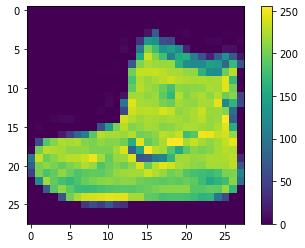

In [8]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
# 归一化（256个灰度值）
train_images = train_images / 255.0
test_images = test_images / 255.0

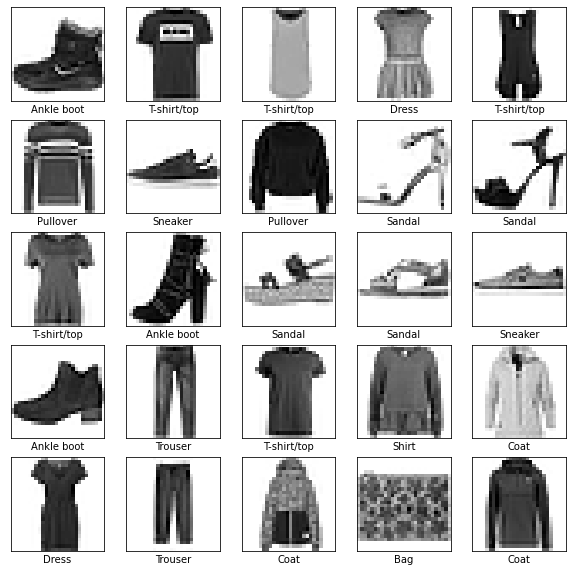

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 构建模型

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), # 将图像格式从二维数组（28 x 28 像素）转换成一维数组（28 x 28 = 784 像素） 
    keras.layers.Dense(128,activation='relu'), # 第一个 Dense 层有 128 个节点（或神经元）
    keras.layers.Dense(10) # 二个（也是最后一个）层会返回一个长度为 10 的 logits 数组
    # 每个节点都包含一个得分，用来表示当前图像属于 10 个类中的哪一类。
])

## 编译模型
### 在此过程中，模型将添加：
+ 损失函数（用于测量模型在训练期间的准确率，最小化）
+ 优化器（决定模型如何根据其看到的数据和自身的损失函数进行更新）
+ 指标（用于监控训练和测试步骤）

In [12]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy']
)

## 训练模型
### 训练神经网络的步骤有：
1. 传送训练数据
2. 模型学习将图像和标签关联起来
3. 要求模型对测试集进行预测
4. 验证预测是否准确

In [13]:
model.fit(train_images, train_labels, epochs=10) # 将模型与数据进行拟合, epochs：经过训练集的次数

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4993 - accuracy: 0.8244
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3779 - accuracy: 0.8641
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3384 - accuracy: 0.8761
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3155 - accuracy: 0.8823
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2947 - accuracy: 0.8911
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2816 - accuracy: 0.8961
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2678 - accuracy: 0.8997
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2553 - accuracy: 0.9055
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2463 - accuracy: 0.9073
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.237

In [14]:
# 准确率评估
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
print('\nTest accuracy:',test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3652 - accuracy: 0.8794

Test accuracy: 0.8794000148773193


In [15]:
# 预测
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])
# 模型在预测图像时，会有线性输出(logits)，这里添加Softmax层可将logits转换成概率

In [16]:
predictions = probability_model(test_images)

In [17]:
predictions[0] # 代表模型对 10 种不同服装中每种服装的“置信度”

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([1.0906626e-08, 3.5721450e-11, 6.6834316e-10, 4.7500605e-13,
       2.0419360e-07, 4.1824713e-02, 1.6283343e-08, 3.8745739e-02,
       2.0871648e-08, 9.1942930e-01], dtype=float32)>

In [18]:
np.argmax(predictions[0])

9

In [19]:
9 == test_labels[0]

True

In [20]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

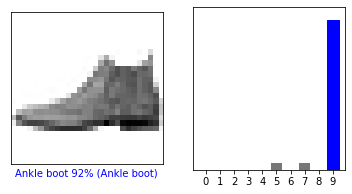

In [21]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)
plt.show()

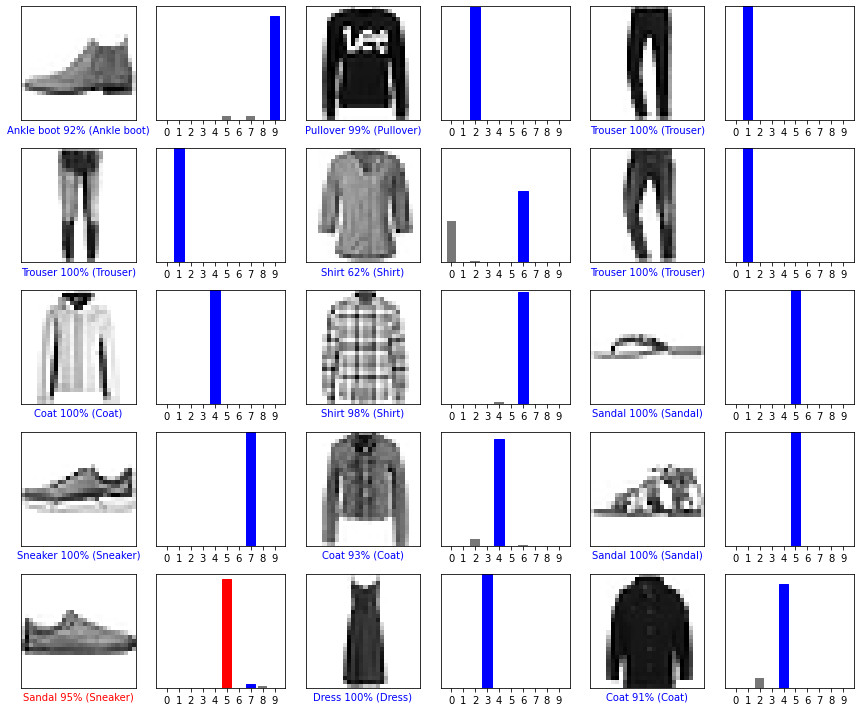

In [22]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows,2*num_cols,2*i+1)
    plot_image(i,predictions[i],test_labels,test_images)
    plt.subplot(num_rows,2*num_cols,2*i+2)
    plot_value_array(i,predictions[i],test_labels)
plt.tight_layout()
plt.show()
# 置信度很高，但模型仍会出错

## 使用训练好的模型

In [23]:
img = test_images[1]

print(img.shape)

(28, 28)


In [24]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [25]:
# 预测其正确标签
predictions_single = probability_model.predict(img)

print(predictions_single)

[[2.0655020e-06 5.2951087e-17 9.9409544e-01 2.3435484e-14 5.8499323e-03
  2.5118427e-12 5.2448431e-05 3.3030203e-16 1.1895752e-10 7.3091176e-15]]


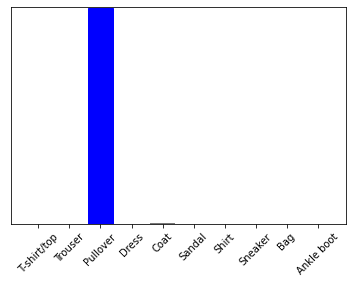

In [26]:
plot_value_array(1,predictions_single[0],test_labels)
_ = plt.xticks(range(10),class_names,rotation=45)

In [27]:
np.argmax(predictions_single[0])

2